In [1]:
# Import necessary libraries
import pandas as pd

# --- 1. Load your dataset from the local folder ---
# This code assumes 'Gym-1.csv' is in the same folder as your script.
try:
    file_path = 'Gym.csv'
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at '{file_path}'")
    print("Please make sure the file is in the same folder as your script.")

# --- 2. Initial Data Exploration ---
# This part of the code remains exactly the same.
if 'df' in locals():
    print("\n--- First 5 rows of the dataset ---")
    print(df.head())

    print("\n--- Dataset Information ---")
    df.info()

    # Replace 'activity' with the actual name of your label column if it's different
    if 'activity' in df.columns:
        print("\n--- Exercise Class Distribution ---")
        print(df['activity'].value_counts())
    else:
        print("\nWarning: 'activity' column not found. Please check your column names.")

Dataset loaded successfully!

--- First 5 rows of the dataset ---
   Subject Position  Session       A_x       A_y       A_z       G_x  \
0        1    wrist        1  0.501125  0.500625  0.500500  0.500156   
1        1    wrist        1  0.500250  0.499750  0.501250  0.499531   
2        1    wrist        1  0.500250  0.499375  0.501875  0.499613   
3        1    wrist        1  0.499625  0.499750  0.500875  0.499494   
4        1    wrist        1  0.500000  0.499000  0.501000  0.499650   

        G_y       G_z       C_1 Workout  
0  0.499962  0.500313  0.501227    Null  
1  0.500550  0.500081  0.501584    Null  
2  0.500231  0.500119  0.501508    Null  
3  0.500350  0.500588  0.502032    Null  
4  0.500588  0.499769  0.501756    Null  

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4703320 entries, 0 to 4703319
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Subject   int64  
 1   Position  object 
 2   Session   

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Configuration ---
# Set to False to run on the full dataset (will be very slow and may crash)
USE_DATA_SAMPLE = True
# Using a 5% sample to prevent memory errors
SAMPLE_FRACTION = 0.05

print("--- Preparing Data ---")

# Ensure the dataframe 'df' exists from the first cell
if 'df' in locals():
    # Separate Features (X) and Labels (y) using the correct column name 'Workout'
    X = df.drop('Workout', axis=1)
    y = df['Workout']

    # Drop the non-numeric 'Position' column
    if 'Position' in X.columns:
        X = X.drop('Position', axis=1)

    # Split data into initial training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Create a smaller sample of the training data if enabled
    if USE_DATA_SAMPLE:
        print(f"Using a {SAMPLE_FRACTION*100}% sample of the training data.")
        X_train, _, y_train, _ = train_test_split(
            X_train, y_train, train_size=SAMPLE_FRACTION, random_state=42, stratify=y_train
        )

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("\nData preparation complete.")
    print(f"Final training set size: {len(X_train)} rows")
    print(f"Testing set size: {len(X_test)} rows")
else:
    print("Error: The dataframe 'df' was not found. Please run the first cell successfully before running this one.")

--- Preparing Data ---
Using a 5.0% sample of the training data.

Data preparation complete.
Final training set size: 188132 rows
Testing set size: 940664 rows


--- Training Random Forest Model (with Class Weighting) ---

--- Random Forest Classification Report ---
Accuracy: 0.6616730309653607
              precision    recall  f1-score   support

    Adductor       0.84      0.14      0.23     29021
     ArmCurl       0.80      0.19      0.31     31925
  BenchPress       0.73      0.08      0.14     28326
     LegCurl       0.71      0.14      0.24     27547
    LegPress       0.76      0.22      0.34     33158
        Null       0.65      0.96      0.77    521422
      Riding       0.82      0.35      0.50     52625
RopeSkipping       0.77      0.45      0.57     10625
     Running       0.68      0.67      0.68     43046
       Squat       0.74      0.19      0.30     50358
StairClimber       0.64      0.24      0.35     56003
     Walking       0.69      0.43      0.53     56608

    accuracy                           0.66    940664
   macro avg       0.74      0.34      0.41    940664
weighted avg       0.69      0.66      0.60    940664


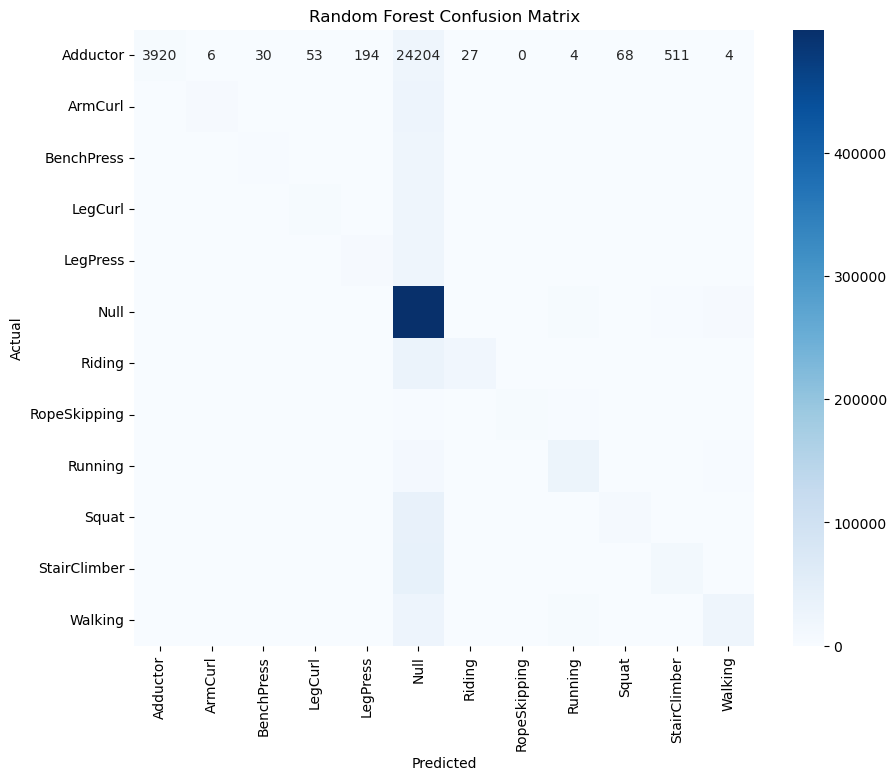

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("--- Training Random Forest Model (with Class Weighting) ---")

# Initialize and train the model
# CORRECTED: Added class_weight='balanced' to handle the imbalanced dataset
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')

# This part remains the same
rf_model.fit(X_train, y_train) # Uses the unscaled data

# Make predictions
rf_predictions = rf_model.predict(X_test)

print("\n--- Random Forest Classification Report ---")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

# Plot the Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

--- Training Support Vector Machine (SVM) Model ---

--- SVM Classification Report ---
Accuracy: 0.6230460610802582


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Adductor       0.00      0.00      0.00     29021
     ArmCurl       0.74      0.15      0.24     31925
  BenchPress       0.74      0.00      0.00     28326
     LegCurl       0.64      0.05      0.10     27547
    LegPress       0.00      0.00      0.00     33158
        Null       0.61      0.97      0.75    521422
      Riding       0.78      0.25      0.38     52625
RopeSkipping       0.77      0.39      0.52     10625
     Running       0.68      0.67      0.68     43046
       Squat       0.78      0.12      0.20     50358
StairClimber       0.72      0.00      0.00     56003
     Walking       0.62      0.39      0.48     56608

    accuracy                           0.62    940664
   macro avg       0.59      0.25      0.28    940664
weighted avg       0.61      0.62      0.53    940664



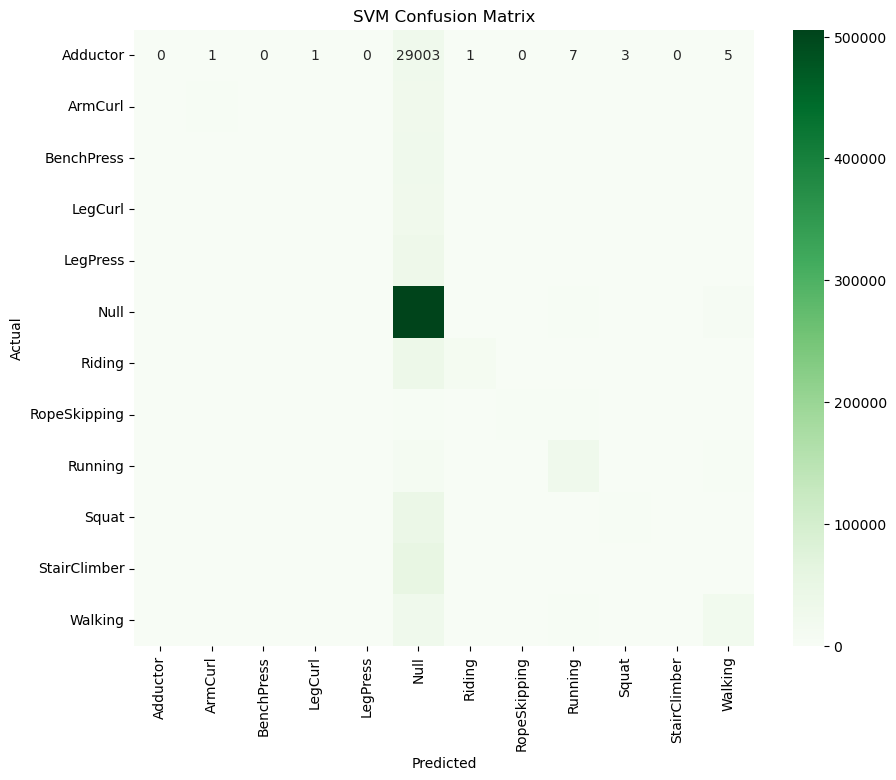

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("--- Training Support Vector Machine (SVM) Model ---")

# Initialize and train the model
# This uses the scaled version of the training data sample we created in the second cell
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train) 

# Make predictions on the scaled test set
svm_predictions = svm_model.predict(X_test_scaled)

print("\n--- SVM Classification Report ---")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

# Plot the Confusion Matrix
cm_svm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('SVM Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



--- Training Neural Network (MLP) Model ---

--- MLP Classification Report ---
Accuracy: 0.6377888385225755
              precision    recall  f1-score   support

    Adductor       0.57      0.16      0.25     29021
     ArmCurl       0.70      0.20      0.31     31925
  BenchPress       0.54      0.10      0.17     28326
     LegCurl       0.49      0.16      0.24     27547
    LegPress       0.55      0.24      0.33     33158
        Null       0.66      0.92      0.77    521422
      Riding       0.60      0.35      0.44     52625
RopeSkipping       0.69      0.43      0.53     10625
     Running       0.61      0.61      0.61     43046
       Squat       0.48      0.23      0.31     50358
StairClimber       0.47      0.25      0.33     56003
     Walking       0.52      0.37      0.43     56608

    accuracy                           0.64    940664
   macro avg       0.57      0.33      0.39    940664
weighted avg       0.61      0.64      0.59    940664



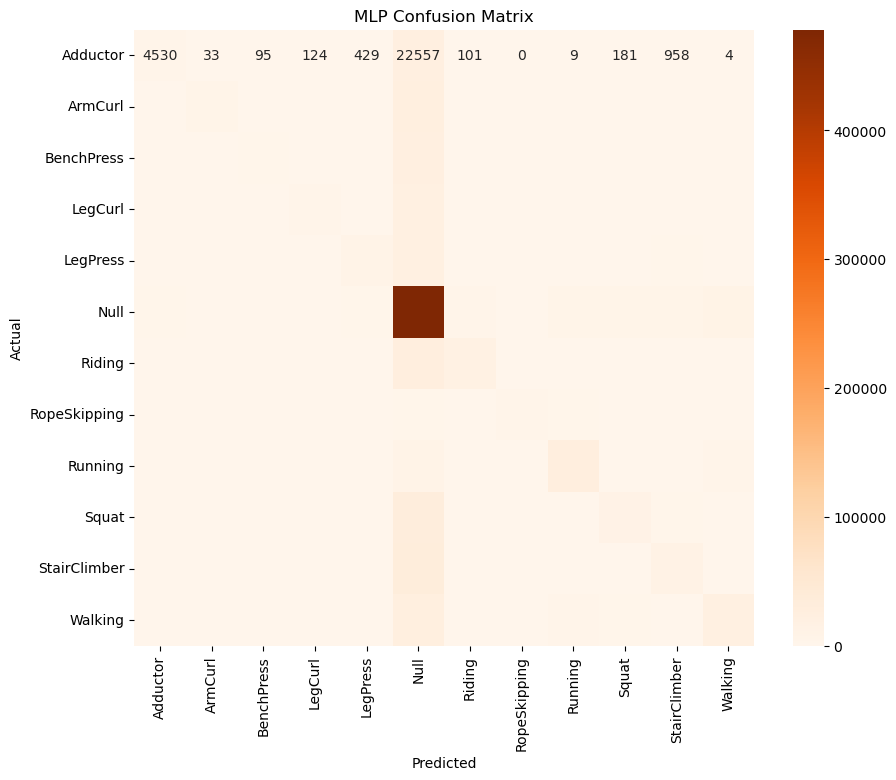

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\n\n--- Training Neural Network (MLP) Model ---")

# Initialize and train the model
# This uses the scaled version of the training data sample
mlp_model = MLPClassifier(random_state=42, max_iter=300, hidden_layer_sizes=(100, 50), early_stopping=True)
mlp_model.fit(X_train_scaled, y_train) 

# Make predictions
mlp_predictions = mlp_model.predict(X_test_scaled)

print("\n--- MLP Classification Report ---")
print("Accuracy:", accuracy_score(y_test, mlp_predictions))
print(classification_report(y_test, mlp_predictions))

# Plot the Confusion Matrix
cm_mlp = confusion_matrix(y_test, mlp_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('MLP Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [6]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 253.7 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


--- Training XGBoost Model ---

--- XGBoost Classification Report ---
Accuracy: 0.6545514657731134
              precision    recall  f1-score   support

    Adductor       0.70      0.13      0.22     29021
     ArmCurl       0.73      0.21      0.33     31925
  BenchPress       0.58      0.10      0.17     28326
     LegCurl       0.63      0.15      0.24     27547
    LegPress       0.61      0.21      0.32     33158
        Null       0.66      0.93      0.78    521422
      Riding       0.69      0.35      0.46     52625
RopeSkipping       0.74      0.51      0.60     10625
     Running       0.68      0.66      0.67     43046
       Squat       0.60      0.22      0.32     50358
StairClimber       0.50      0.27      0.35     56003
     Walking       0.57      0.46      0.51     56608

    accuracy                           0.65    940664
   macro avg       0.64      0.35      0.41    940664
weighted avg       0.65      0.65      0.60    940664



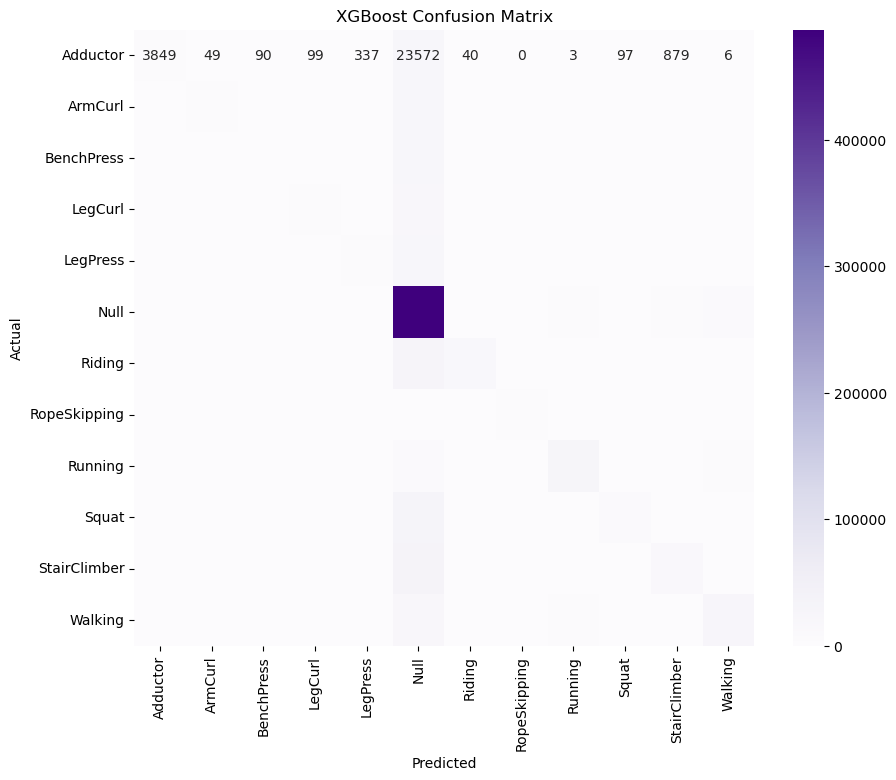

In [7]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Training XGBoost Model ---")

# XGBoost requires labels to be integers (0, 1, 2...).
# We need to convert the text labels ('Walking', 'Running', etc.) to numbers.
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Initialize and train the model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train_encoded) # Uses unscaled data

# Make predictions
xgb_predictions_encoded = xgb_model.predict(X_test)

# Convert the numeric predictions back to the original text labels for the report
xgb_predictions = le.inverse_transform(xgb_predictions_encoded)

print("\n--- XGBoost Classification Report ---")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print(classification_report(y_test, xgb_predictions))

# Plot the Confusion Matrix
cm_xgb = confusion_matrix(y_test, xgb_predictions)
plt.figure(figsize=(10, 8))
# Use le.classes_ to get the correct text labels for the plot axes
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [8]:
pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 302.4 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


--- Training LightGBM Model ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1802
[LightGBM] [Info] Number of data points in the train set: 188132, number of used features: 9
[LightGBM] [Info] Start training from score -3.478597
[LightGBM] [Info] Start training from score -3.383192
[LightGBM] [Info] Start training from score -3.502837
[LightGBM] [Info] Start training from score -3.530761
[LightGBM] [Info] Start training from score -3.345237
[LightGBM] [Info] Start training from score -0.590026
[LightGBM] [Info] Start training from score -2.883390
[LightGBM] [Info] Start training from score -4.483372
[LightGBM] [Info] Start training from score -3.084336
[LightGBM] [Info] Start training from score -2.927385
[LightGBM] [Info] Start training from score -2.821230
[LightGBM] [Info] Sta

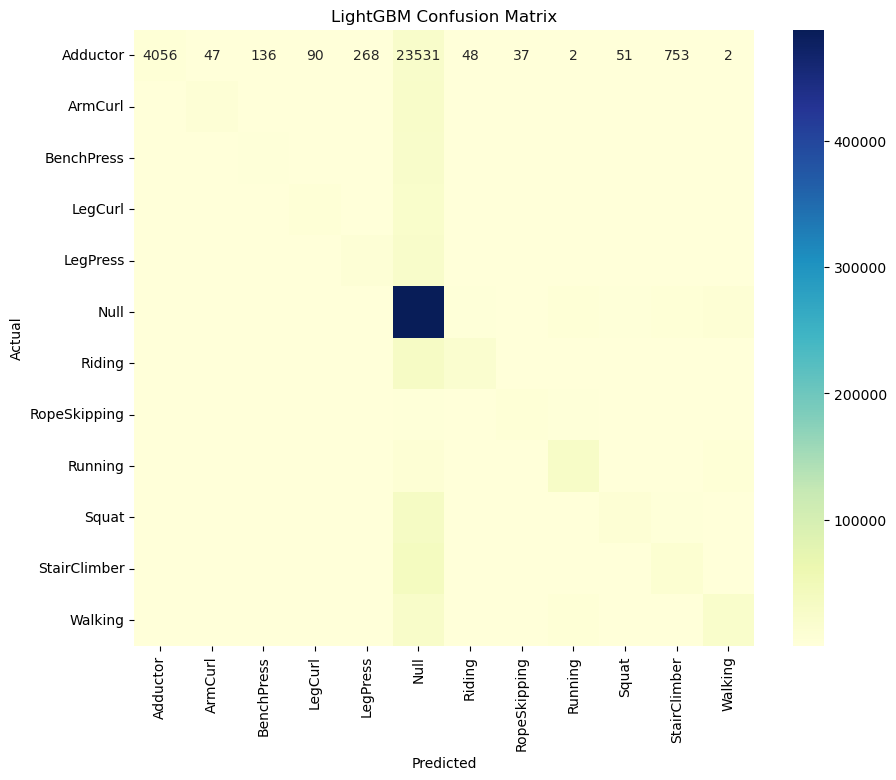

In [9]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Training LightGBM Model ---")

# LightGBM, like XGBoost, requires integer labels. We can reuse the LabelEncoder.
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Initialize and train the model
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42, n_jobs=-1)
lgb_model.fit(X_train, y_train_encoded) # Uses unscaled data

# Make predictions
lgb_predictions_encoded = lgb_model.predict(X_test)

# Convert the numeric predictions back to the original text labels for the report
lgb_predictions = le.inverse_transform(lgb_predictions_encoded)

print("\n--- LightGBM Classification Report ---")
print("Accuracy:", accuracy_score(y_test, lgb_predictions))
print(classification_report(y_test, lgb_predictions))

# Plot the Confusion Matrix
cm_lgb = confusion_matrix(y_test, lgb_predictions)
plt.figure(figsize=(10, 8))
# Use le.classes_ to get the correct text labels for the plot axes
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='YlGnBu', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('LightGBM Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [4]:
pip install -U ipykernel

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.utils import to_categorical

print("--- Training 1D CNN Model ---")

# --- Data Preparation for CNN ---
# CNNs need the labels to be one-hot encoded (e.g., 'Walking' -> [0,0,0,1,...])
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# CNNs also need an extra dimension in the input data
X_train_reshaped = np.expand_dims(X_train_scaled, axis=2)
X_test_reshaped = np.expand_dims(X_test_scaled, axis=2)

# --- Build the CNN Model ---
cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    Dropout(0.5),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dense(len(le.classes_), activation='softmax') # Output layer with one node per class
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

# --- Train the Model ---
history = cnn_model.fit(
    X_train_reshaped, y_train_categorical,
    epochs=20,
    batch_size=128,
    validation_split=0.2, # Use part of the training data to monitor for overfitting
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

# --- Evaluate the Model ---
# Get the predicted probabilities for each class
cnn_predictions_proba = cnn_model.predict(X_test_reshaped)
# Find the class with the highest probability
cnn_predictions_encoded = np.argmax(cnn_predictions_proba, axis=1)

# Convert numeric predictions back to text labels
cnn_predictions = le.inverse_transform(cnn_predictions_encoded)

print("\n--- 1D CNN Classification Report ---")
print("Accuracy:", accuracy_score(y_test, cnn_predictions))
print(classification_report(y_test, cnn_predictions))

# Plot the Confusion Matrix
cm_cnn = confusion_matrix(y_test, cnn_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Reds', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('1D CNN Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [3]:
pip show tensorflow

Name: tensorflow
Version: 2.16.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/anaconda3/lib/python3.11/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
nvidia-smi

NameError: name 'nvidia' is not defined